In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('api_data_aadhar_biometric_0_500000.csv')
data2=pd.read_csv('api_data_aadhar_biometric_500000_1000000.csv')
data3=pd.read_csv('api_data_aadhar_biometric_1000000_1500000.csv')
data4=pd.read_csv('api_data_aadhar_biometric_1500000_1861108.csv')

data= pd.concat([data1, data2, data3, data4], ignore_index=True)

In [3]:
 data

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815
...,...,...,...,...,...,...
1861103,29-12-2025,West Bengal,Uttar Dinajpur,733201,4,9
1861104,29-12-2025,West Bengal,Uttar Dinajpur,733213,0,1
1861105,29-12-2025,West Bengal,West Midnapore,721304,0,3
1861106,29-12-2025,West Bengal,West Midnapore,721451,2,0


In [4]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])
data

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-01-03,Haryana,Mahendragarh,123029,280,577
1,2025-01-03,Bihar,Madhepura,852121,144,369
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091
3,2025-01-03,Bihar,Bhojpur,802158,256,980
4,2025-01-03,Tamil Nadu,Madurai,625514,271,815
...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3


In [5]:
#Insight: Allows trend + seasonal analysis

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,1
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,1
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,1
3,2025-01-03,Bihar,Bhojpur,802158,256,980,2025,1
4,2025-01-03,Tamil Nadu,Madurai,625514,271,815,2025,1
...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,12
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,12
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,12
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,12


In [6]:
# Remove outliers (top 1% extreme values per district)
for col in ['bio_age_5_17', 'bio_age_17_']:
    q99 = data.groupby('district')[col].quantile(0.99)
    data[col] = np.where(data.groupby('district')[col].transform(lambda x: x > q99.loc[x.name]), 0, data[col])
data

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,1
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,1
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,1
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,1
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,1
...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,12
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,12
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,12
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,12


In [7]:
#Insight: Negative or extreme values = data/system issues
 
cols = ['bio_age_5_17', 'bio_age_17_']

for col in cols:
    data[col] = data[col].clip(lower=0)
data[cols].describe()


,bio_age_5_17,bio_age_17_
count,917008.000000,917008.000000
mean,22.997357,24.630688
std,78.405885,83.314625
min,0.000000,0.000000
25%,1.000000,1.000000
50%,4.000000,4.000000
75%,14.000000,13.000000
max,4157.000000,4231.000000


In [8]:
#finding null values

data.isnull().sum()


date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
year            0
month           0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(45044)

In [10]:
data[data.duplicated()].head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month
110000,2025-01-09,Chhattisgarh,Kondagaon,494229,0,1,2025,1
110001,2025-01-09,Chhattisgarh,Kondagaon,494230,1,0,2025,1
110002,2025-01-09,Chhattisgarh,Korba,495119,5,35,2025,1
110003,2025-01-09,Chhattisgarh,Korba,495446,0,16,2025,1
110004,2025-01-09,Chhattisgarh,Korba,495674,10,34,2025,1


In [11]:
data.duplicated(subset=[
    'date', 'state', 'district', 'pincode',
    'bio_age_5_17', 'bio_age_17_'
]).sum()


np.int64(45044)

In [12]:
 
df_clean = data.drop_duplicates(keep='first')
df_clean

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,1
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,1
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,1
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,1
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,1
...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,12
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,12
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,12
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,12


In [13]:
df_clean.duplicated().sum()

np.int64(0)

In [14]:
#Total biometric updates
df_clean['total_updates'] = df_clean['bio_age_5_17'] + df_clean['bio_age_17_']
df_clean

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_updates
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,1,857
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,1,513
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,1,1734
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,1,256
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,1,271
...,...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,12,4
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,12,2
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,12,2
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,12,9


In [15]:
#Biometric Transition Pressure Index (BTPI)

df_clean['btpi'] = df_clean['bio_age_17_'] / (df_clean['bio_age_5_17'] + 1)


In [16]:
df_clean

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_updates,btpi
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,1,857,2.053381
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,1,513,2.544828
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,1,1734,1.694099
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,1,256,0.000000
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,1,271,0.000000
...,...,...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,12,4,0.250000
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,12,2,2.000000
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,12,2,0.000000
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,12,9,0.428571


In [17]:
#Find states with unstable adult biometrics

state_btpi = df_clean.groupby('state')['btpi'].mean().sort_values(ascending=False)
state_btpi

state
Dadra and Nagar Haveli                      20.748363
Chhattisgarh                                 5.998921
Delhi                                        5.723327
Madhya Pradesh                               4.709420
Maharashtra                                  4.347645
Nagaland                                     4.238202
Jharkhand                                    4.103208
Bihar                                        4.036613
Pondicherry                                  3.979021
Jammu and Kashmir                            3.102624
Tripura                                      2.935499
Haryana                                      2.907870
Punjab                                       2.785784
Gujarat                                      2.548808
Rajasthan                                    2.474983
Odisha                                       2.340821
Kerala                                       2.289670
Andaman & Nicobar Islands                    2.194402
Tamil Nadu            

In [18]:
#True → high-risk biometric instability zone
#False → normal zone

df_clean['high_risk'] = df_clean['btpi'] > 3
df_clean

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_updates,btpi,high_risk
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,1,857,2.053381,False
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,1,513,2.544828,False
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,1,1734,1.694099,False
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,1,256,0.000000,False
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,1,271,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,12,4,0.250000,False
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,12,2,2.000000,False
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,12,2,0.000000,False
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,12,9,0.428571,False


In [19]:
df_clean['btpi'].describe()


count    871964.000000
mean          2.593754
std          29.952182
min           0.000000
25%           0.428571
50%           1.000000
75%           1.500000
max        4231.000000
Name: btpi, dtype: float64

In [20]:
#Count high-risk zones

df_clean['high_risk'].value_counts()


high_risk
False    814813
True      57151
Name: count, dtype: int64

In [21]:
#Find top high-risk districts
df_clean[df_clean['high_risk']].groupby('district').size().sort_values(ascending=False)


district
Bangalore          970
Thane              837
Viluppuram         760
Hyderabad          656
Mumbai             649
                  ... 
Khowai               1
Auraiya              1
Kalimpong            1
Jalaun               1
Upper Subansiri      1
Length: 863, dtype: int64

<Axes: xlabel='high_risk', ylabel='count'>

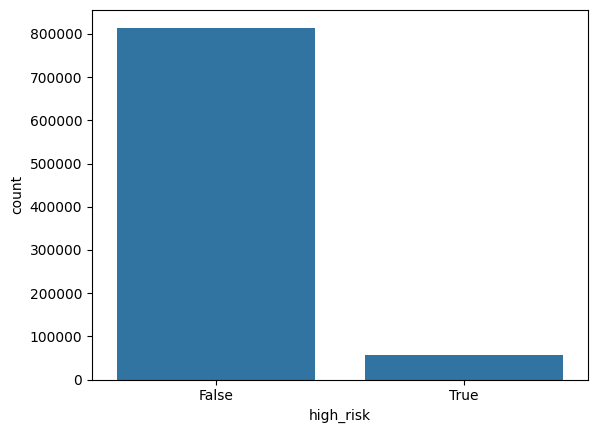

In [22]:
#Visualize on chart

sns.countplot(x='high_risk', data=df_clean)


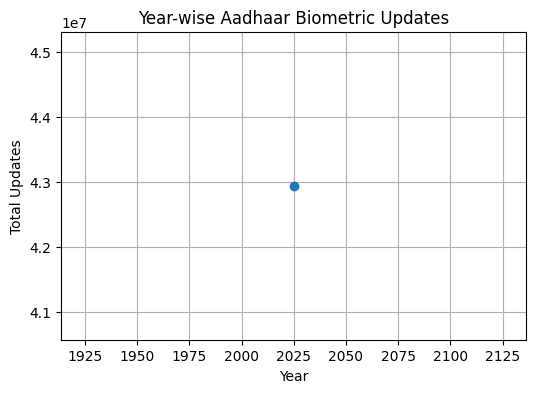

In [24]:
#Overall trend (SYSTEM STABILITY)

yearly = df_clean.groupby('year')['total_updates'].sum()
 
plt.figure(figsize=(6,4))
yearly.plot(marker='o')
plt.title("Year-wise Aadhaar Biometric Updates")
plt.xlabel("Year")
plt.ylabel("Total Updates")
plt.grid(True)
plt.show()

 



In [25]:
#Create month column
df_clean['month'] = df_clean['date'].dt.to_period('M')
df_clean

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_updates,btpi,high_risk
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,2025-01,857,2.053381,False
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,2025-01,513,2.544828,False
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,2025-01,1734,1.694099,False
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,2025-01,256,0.000000,False
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,2025-01,271,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,2025-12,4,0.250000,False
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,2025-12,2,2.000000,False
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,2025-12,2,0.000000,False
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,2025-12,9,0.428571,False


In [26]:
#Group by month
monthly = df_clean.groupby('month')['total_updates'].sum()
monthly

month
2025-01    31770241
2025-02     1205151
2025-03     1110670
2025-04      966745
2025-05      765466
2025-06      955226
2025-07      561296
2025-08     1071723
2025-09     1049540
2025-10     1021268
2025-11     1205714
2025-12     1258510
Freq: M, Name: total_updates, dtype: int64

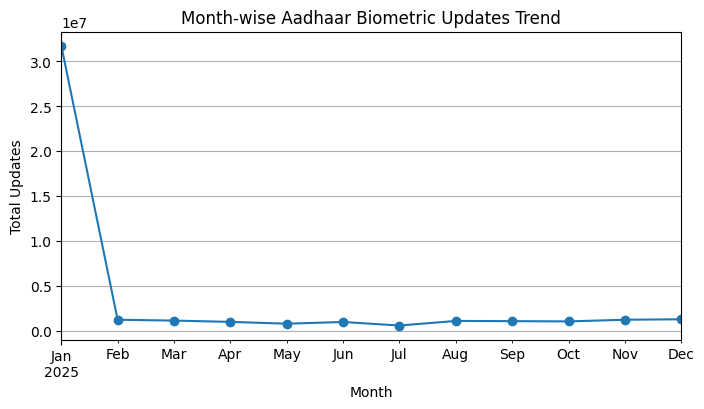

In [27]:
#Plot
plt.figure(figsize=(8,4))
monthly.plot(marker='o')
plt.title("Month-wise Aadhaar Biometric Updates Trend")
plt.xlabel("Month")
plt.ylabel("Total Updates")
plt.grid(True)
plt.show()

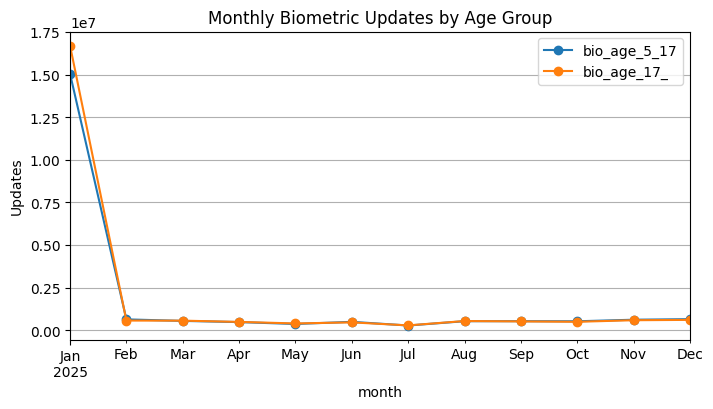

In [28]:


monthly_age = df_clean.groupby('month')[['bio_age_5_17','bio_age_17_']].sum()

monthly_age.plot(figsize=(8,4), marker='o')
plt.title("Monthly Biometric Updates by Age Group")
plt.ylabel("Updates")
plt.grid(True)
plt.show()


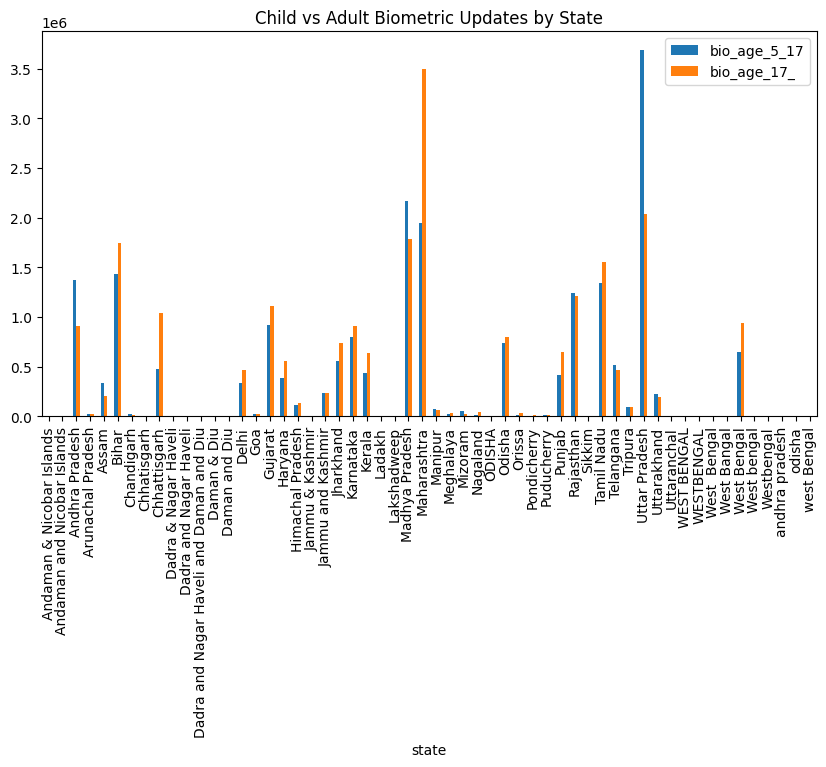

In [29]:
#Age-group comparison

#Insight- States where adult updates dominate → fingerprint failure / revalidation


state_age = df_clean.groupby('state')[cols].sum()

state_age.plot(kind='bar', figsize=(10,5))
plt.title("Child vs Adult Biometric Updates by State")
plt.show()

 


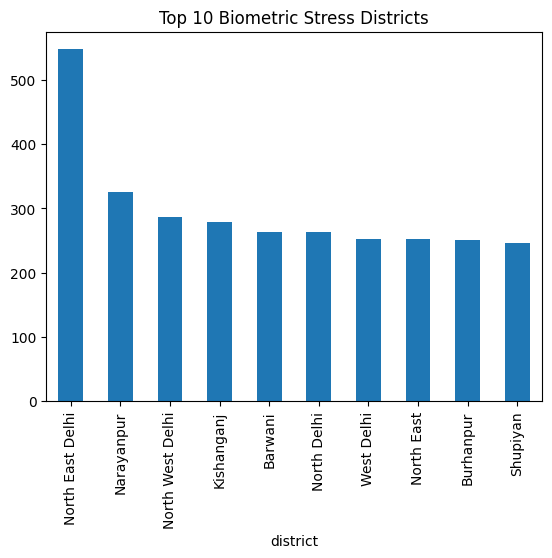

In [30]:
#Biometric Stress Zones

#Decision use - Target these districts for camps & extra devices


district_updates = df_clean.groupby('district')['total_updates'].mean().sort_values(ascending=False)

district_updates.head(10).plot(kind='bar')
plt.title("Top 10 Biometric Stress Districts")
plt.show()


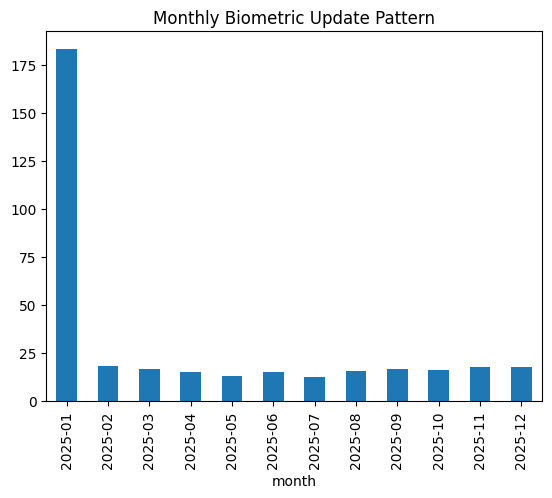

In [31]:
#Seasonal pattern

#Insight - Identify peak months → overload risk

monthly = df_clean.groupby('month')['total_updates'].mean()

monthly.plot(kind='bar')
plt.title("Monthly Biometric Update Pattern")
plt.show()




In [32]:
#This step finds unusually high update counts that may signal errors, spikes, or unusual activity

threshold = df_clean['total_updates'].mean() + 3 * df_clean['total_updates'].std()
df_clean['anomaly'] = df_clean['total_updates'] > threshold
df_clean

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_updates,btpi,high_risk,anomaly
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,2025-01,857,2.053381,False,True
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,2025-01,513,2.544828,False,True
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,2025-01,1734,1.694099,False,True
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,2025-01,256,0.000000,False,False
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,2025-01,271,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,2025-12,4,0.250000,False,False
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,2025-12,2,2.000000,False,False
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,2025-12,2,0.000000,False,False
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,2025-12,9,0.428571,False,False


In [33]:
df_clean[df_clean['anomaly']].head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_updates,btpi,high_risk,anomaly
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,2025-01,857,2.053381,False,True
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,2025-01,513,2.544828,False,True
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,2025-01,1734,1.694099,False,True
27,2025-01-03,Maharashtra,Wardha,442101,269,538,2025,2025-01,807,1.992593,False,True
28,2025-01-03,Odisha,Nabarangapur,764075,438,605,2025,2025-01,1043,1.378132,False,True


In [35]:
 df_clean

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_updates,btpi,high_risk,anomaly
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025,2025-01,857,2.053381,False,True
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025,2025-01,513,2.544828,False,True
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025,2025-01,1734,1.694099,False,True
3,2025-01-03,Bihar,Bhojpur,802158,256,0,2025,2025-01,256,0.000000,False,False
4,2025-01-03,Tamil Nadu,Madurai,625514,271,0,2025,2025-01,271,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1598977,2025-12-12,Telangana,Nalgonda,508279,3,1,2025,2025-12,4,0.250000,False,False
1598978,2025-12-12,Telangana,Nalgonda,508280,0,2,2025,2025-12,2,2.000000,False,False
1598979,2025-12-12,Telangana,Nalgonda,508285,2,0,2025,2025-12,2,0.000000,False,False
1598980,2025-12-12,Telangana,Narayanpet,509208,6,3,2025,2025-12,9,0.428571,False,False


In [36]:
#Load & Preprocess Data
 

# Date handling
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean = df_clean.sort_values(['district', 'date'])

# Avoid division by zero
df_clean['total_updates'] = df_clean['total_updates'].replace(0, np.nan)

# Feature engineering
df_clean['age_transition_ratio'] = df_clean['bio_age_5_17'] / df_clean['total_updates']
df_clean['adult_update_ratio'] = df_clean['bio_age_17_'] / df_clean['total_updates']

# Rolling features per district
df_clean['rolling_mean_3'] = df_clean.groupby('district')['total_updates'].transform(
    lambda x: x.rolling(3).mean()
)

df_clean['rolling_mean_6'] = df_clean.groupby('district')['total_updates'].transform(
    lambda x: x.rolling(6).mean()
)

# Trend feature
df_clean['trend'] = df_clean.groupby('district')['total_updates'].diff()

# Fill missing values
df_clean.fillna(0, inplace=True)


In [37]:
#converting the datatype

df_clean['month'] = df_clean['date'].dt.month.astype(int)
df_clean['year'] = df_clean['date'].dt.year.astype(int)


In [38]:
#Prepare Training Data

from sklearn.model_selection import train_test_split
features = [
    'month',
    'btpi',
    'age_transition_ratio',
    'adult_update_ratio',
    'rolling_mean_3',
    'rolling_mean_6',
    'trend',
    'high_risk',
    'anomaly'
]

X = df_clean[features].astype(float)
y = df_clean['total_updates'].astype(float)


In [ ]:
#Final Training Code

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
#Model Evaluation

#We used MAE and R² to ensure prediction accuracy while keeping interpretability

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on test set
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")


In [ ]:
#Age transition pressure and recent rolling averages are the strongest drivers

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values(by='coefficient', ascending=False)

print(feature_importance)


In [ ]:
#Predict Next 6 Months

def predict_next_months(df_clean, model, features, months=6):
    future_predictions = []

    latest_data = df_clean.groupby('district').tail(1)

    for m in range(1, months + 1):
        temp = latest_data.copy()

        # Increment month cyclically
        temp['month'] = ((temp['month'] + m - 1) % 12) + 1

        # Predict
        temp['predicted_updates'] = model.predict(temp[features])

        temp['prediction_horizon_month'] = m
        future_predictions.append(temp)

    return pd.concat(future_predictions, ignore_index=True)

future_predictions = predict_next_months(df_clean, model, X.columns, months=6)
future_predictions

In [ ]:
#Identify High-Risk / Overload Districts
#This enables UIDAI to act before overload occurs
# Threshold = top 10% historical load
overload_threshold = df_clean['total_updates'].quantile(0.90)

future_predictions['overload_risk'] = (
    future_predictions['predicted_updates'] > overload_threshold
)

# High-risk districts
high_risk_districts = future_predictions[
    future_predictions['overload_risk'] == True
][['state', 'district', 'prediction_horizon_month', 'predicted_updates']]

print(high_risk_districts.head(10))


In [ ]:
#District Risk Scoring (Biometric Update Pressure Score)

district_risk_score = (
    future_predictions
    .groupby(['state', 'district'])['predicted_updates']
    .mean()
    .reset_index()
    .rename(columns={'predicted_updates': 'avg_predicted_updates'})
    .sort_values(by='avg_predicted_updates', ascending=False)
)

print(district_risk_score.head(10))


In [ ]:
#Export Results

future_predictions.to_csv("future_biometric_update_predictions.csv", index=False)
district_risk_score.to_csv("district_risk_ranking.csv", index=False)
feature_importance.to_csv("model_feature_importance.csv", index=False)


In [ ]:
#Visual: Actual vs Predicted

import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Biometric Updates")
plt.show()
